<a href="https://github.com/Agod1/Angular-AlbumStoreProductPage/blob/master/models_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Running predictions on the CIFAR-10 dataset from Kaggle using a pre-trained model**

https://github.com/Agod1/Angular-AlbumStoreProductPage/blob/master/models_kaggle.ipynb

In [1]:
!pip install torch torchvision matplotlib scikit-learn

Download CIFAR-10 Dataset from Kaggle

In [2]:
# dowload needed library
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet50
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Define transformations to resize and normalize images to fit ResNet50 input requirements
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet50 expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
# Load CIFAR-10 test dataset with transformations
cifar10_test = CIFAR10(root="./data", train=False, download=True, transform=transform)
test_loader = DataLoader(cifar10_test, batch_size=32, shuffle=False)
class_names = cifar10_test.classes

100%|██████████| 170M/170M [00:01<00:00, 89.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


Load the Pre-trained ResNet50 Model

In [5]:
# Load the pre-trained ResNet50 model and set to evaluation mode for inference.
model = resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, len(class_names))  # Replace with 10 for CIFAR-10
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 120MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Run Inference and Collect Predictions

In [6]:
true_labels, predicted_labels = [], []

# Run inference
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Store true and predicted labels
        true_labels.extend(labels.numpy())
        predicted_labels.extend(preds.numpy())

# Convert true and predicted labels to class names for better interpretability
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

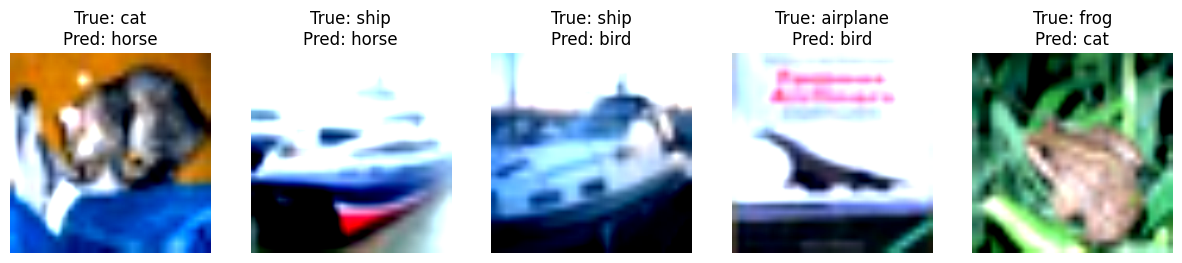

In [7]:
# Show sample predictions
fig, axs = plt.subplots(1, 5, figsize=(15, 4))

for i in range(5):
    ax = axs[i]
    ax.imshow(cifar10_test[i][0].permute(1, 2, 0).numpy() * 0.5 + 0.5)  # De-normalize for display
    ax.set_title(f"True: {true_class_names[i]}\nPred: {predicted_class_names[i]}")
    ax.axis("off")
plt.show()

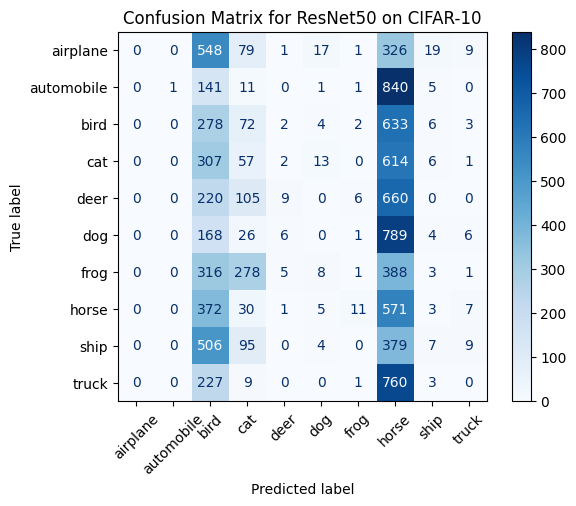

In [8]:
# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=list(range(10)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for ResNet50 on CIFAR-10")
plt.show()

The MobileNetV2 model exhibited poor performance on the CIFAR-10 dataset also from Kaggle, as shown by the confusion matrix. Misclassifications were widespread across nearly all classes, indicating that the model struggled to accurately differentiate between the dataset’s diverse categories, such as animals and vehicles. This underperformance could stem from MobileNetV2's lightweight architecture, which, while efficient, may lack the complexity needed to capture the fine-grained features required for CIFAR-10’s small, detailed images. Overall, these results suggest that MobileNetV2 may not be well-suited for datasets like CIFAR-10 that require more nuanced feature extraction for accurate classification. Fine-tuning or selecting a model with a deeper architecture might improve performance on this dataset.